# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
city_apis = {}
print('Beginning Data Retrieval')  
print('-----------------------------')
i = 1
for city_name in cities:
    print(f'Processing Record {i} of Set 1 | {city_name}')
    try:
        r = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
        city_apis[city_name]=r
    except:
        print('City not found. Skipping...')
    i+=1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | taolanaro
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | santa isabel do rio negro
Processing Record 7 of Set 1 | ayagoz
Processing Record 8 of Set 1 | olga
Processing Record 9 of Set 1 | bodden town
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | turbat
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | bardiyah
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | araouane
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | naberera
Processing Record 23 of Set 1 | champaign


Processing Record 197 of Set 1 | port macquarie
Processing Record 198 of Set 1 | qafsah
Processing Record 199 of Set 1 | ribeira grande
Processing Record 200 of Set 1 | atlantic beach
Processing Record 201 of Set 1 | yuzhno-yeniseyskiy
Processing Record 202 of Set 1 | san patricio
Processing Record 203 of Set 1 | nueva loja
Processing Record 204 of Set 1 | muros
Processing Record 205 of Set 1 | tazovskiy
Processing Record 206 of Set 1 | nikolskoye
Processing Record 207 of Set 1 | imbituba
Processing Record 208 of Set 1 | aporawan
Processing Record 209 of Set 1 | saskylakh
Processing Record 210 of Set 1 | beringovskiy
Processing Record 211 of Set 1 | havoysund
Processing Record 212 of Set 1 | mentok
Processing Record 213 of Set 1 | talnakh
Processing Record 214 of Set 1 | ambovombe
Processing Record 215 of Set 1 | sentyabrskiy
Processing Record 216 of Set 1 | la ronge
Processing Record 217 of Set 1 | clyde river
Processing Record 218 of Set 1 | isabela
Processing Record 219 of Set 1 | i

Processing Record 392 of Set 1 | plougastel-daoulas
Processing Record 393 of Set 1 | borba
Processing Record 394 of Set 1 | mastic beach
Processing Record 395 of Set 1 | sylva
Processing Record 396 of Set 1 | turtas
Processing Record 397 of Set 1 | grants
Processing Record 398 of Set 1 | houma
Processing Record 399 of Set 1 | amuntai
Processing Record 400 of Set 1 | phak hai
Processing Record 401 of Set 1 | pajapita
Processing Record 402 of Set 1 | pontivy
Processing Record 403 of Set 1 | tura
Processing Record 404 of Set 1 | itarema
Processing Record 405 of Set 1 | iquique
Processing Record 406 of Set 1 | liuzhou
Processing Record 407 of Set 1 | xai-xai
Processing Record 408 of Set 1 | bull savanna
Processing Record 409 of Set 1 | kahului
Processing Record 410 of Set 1 | monte san pietro
Processing Record 411 of Set 1 | rajapur
Processing Record 412 of Set 1 | marawi
Processing Record 413 of Set 1 | san rafael del sur
Processing Record 414 of Set 1 | nemuro
Processing Record 415 of Se

Processing Record 586 of Set 1 | carutapera
Processing Record 587 of Set 1 | rio verde de mato grosso
Processing Record 588 of Set 1 | phnum penh
Processing Record 589 of Set 1 | sobolevo
Processing Record 590 of Set 1 | skagastrond
Processing Record 591 of Set 1 | mutsamudu
Processing Record 592 of Set 1 | colares
Processing Record 593 of Set 1 | bama
Processing Record 594 of Set 1 | krutikha
Processing Record 595 of Set 1 | san luis
Processing Record 596 of Set 1 | karakol
Processing Record 597 of Set 1 | sinazongwe
Processing Record 598 of Set 1 | doka
Processing Record 599 of Set 1 | bukama
Processing Record 600 of Set 1 | surt
Processing Record 601 of Set 1 | bay roberts
Processing Record 602 of Set 1 | himora
Processing Record 603 of Set 1 | fort nelson
Processing Record 604 of Set 1 | viligili
Processing Record 605 of Set 1 | tuensang
Processing Record 606 of Set 1 | voyvozh
Processing Record 607 of Set 1 | rota
Processing Record 608 of Set 1 | rockhampton
Processing Record 609 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
city_data = []
for city_name in city_apis:
    try:
        r = city_apis[city_name]
        city_info = {'City':city_name}
        city_info['Lat']=r.json()['coord']['lat']
        city_info['Lng']=r.json()['coord']['lon']
        city_info['Max Temp']= (r.json()['main']['temp_max']-273.15) * 9/5 + 32 #adjust for kelvin to Fahrenheit 
        city_info['Humidity']= r.json()['main']['humidity']
        city_info['Cloudiness']= r.json()['clouds']['all']
        city_info['Wind Speed']= r.json()['wind']['speed']
        city_info['Country']= r.json()['sys']['country']
        city_info['Date']= r.json()['dt']
        city_data.append(city_info)
    except:
        print(f'not found|{city_name}')
        
df = pd.DataFrame(city_data)
df.to_csv('cities.csv')


not found|taolanaro
not found|duz
not found|palabuhanratu
not found|mys shmidta
not found|kuche
not found|marcona
not found|grand river south east
not found|samusu
not found|illoqqortoormiut
not found|belushya guba
not found|tsihombe
not found|louisbourg
not found|bid
not found|barentsburg
not found|nizhneyansk
not found|qafsah
not found|yuzhno-yeniseyskiy
not found|aporawan
not found|mentok
not found|sentyabrskiy
not found|yanan
not found|amderma
not found|ngukurr
not found|sikea
not found|culipapa
not found|babanusah
not found|tidore
not found|umzimvubu
not found|tumannyy
not found|eldikan
not found|formoso do araguaia
not found|hunza
not found|attawapiskat
not found|warqla
not found|vaitupu
not found|manzil jamil
not found|ye
not found|tarudant
not found|yirol
not found|saleaula
not found|gurskoye
not found|bokspits
not found|meyungs
not found|yunjinghong
not found|ningan
not found|koboldo
not found|juifang
not found|phnum penh
not found|skagastrond
not found|mutsamudu
not found|him

In [44]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.10,-113.58,46.994,15,1,3.60,US,1603817967
1,dikson,73.51,80.55,10.418,96,100,7.79,RU,1603818042
2,torbay,47.67,-52.73,41.000,100,90,4.10,CA,1603818179
3,castro,-24.79,-50.01,77.954,41,21,4.25,BR,1603818180
4,santa isabel do rio negro,-0.41,-65.02,93.812,48,93,0.65,BR,1603818182
...,...,...,...,...,...,...,...,...,...
570,longhua,23.61,114.19,70.502,70,29,1.19,CN,1603818451
571,batticaloa,7.71,81.69,80.492,80,34,2.36,LK,1603818451
572,villa carlos paz,-31.42,-64.50,84.992,25,0,9.80,AR,1603818451
573,san andres,12.58,-81.70,86.000,79,90,3.60,CO,1603818396


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
print(len(df))
df=df[df['Humidity']<=100].copy()
print(len(df))
df

575
575


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.10,-113.58,46.994,15,1,3.60,US,1603817967
1,dikson,73.51,80.55,10.418,96,100,7.79,RU,1603818042
2,torbay,47.67,-52.73,41.000,100,90,4.10,CA,1603818179
3,castro,-24.79,-50.01,77.954,41,21,4.25,BR,1603818180
4,santa isabel do rio negro,-0.41,-65.02,93.812,48,93,0.65,BR,1603818182
...,...,...,...,...,...,...,...,...,...
570,longhua,23.61,114.19,70.502,70,29,1.19,CN,1603818451
571,batticaloa,7.71,81.69,80.492,80,34,2.36,LK,1603818451
572,villa carlos paz,-31.42,-64.50,84.992,25,0,9.80,AR,1603818451
573,san andres,12.58,-81.70,86.000,79,90,3.60,CO,1603818396


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

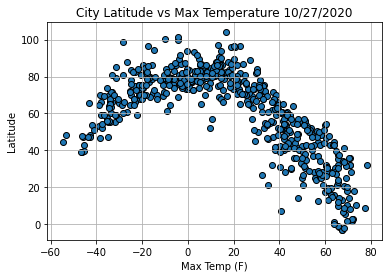

In [50]:
plt.scatter(data = df, x='Lat', y='Max Temp',edgecolors='black')
plt.grid()
plt.title('City Latitude vs Max Temperature 10/27/2020')
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.show()

## Latitude vs. Humidity Plot

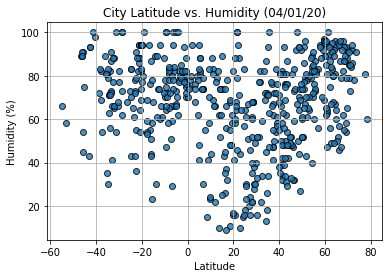

In [11]:
plt.scatter(data = df, x='Lat', y='Humidity',edgecolors='black')
plt.grid()
plt.title('City Latitude vs Humidity 10/27/2020')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

## Latitude vs. Cloudiness Plot

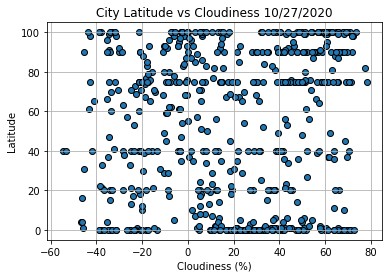

In [52]:
plt.scatter(data = df, x='Lat', y='Cloudiness',edgecolors='black')
plt.grid()
plt.title('City Latitude vs Cloudiness 10/27/2020')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

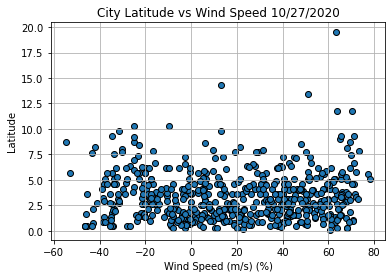

In [53]:
plt.scatter(data = df, x='Lat', y='Wind Speed',edgecolors='black')
plt.grid()
plt.title('City Latitude vs Wind Speed 10/27/2020')
plt.xlabel('Wind Speed (m/s) (%)')
plt.ylabel('Latitude')
plt.show()

## Linear Regression

In [111]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(x,y):
    slope, intercept, r_value, p_value, std_err =linregress(x,y)
    print('The r-squared is:', r_value**2)
    plt.scatter(x,y)
    plt.plot(x,slope*x +intercept)
    if x.iloc[0]<0: #south
        plt.text(-50,10,f'y = {round(slope,2)}x + {round(intercept,2)}',color = 'red',fontsize= 12)
    else:
        plt.text(10.0,10,f'y = {round(slope,2)}x + {round(intercept,2)}',color = 'red',fontsize= 12)
    plt.xlabel('Latitude')
    plt.ylabel(y.name)

In [78]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df[df["Lat"]>0]
south_df = df[df["Lat"]<0]
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.10,-113.58,46.994,15,1,3.60,US,1603817967
1,dikson,73.51,80.55,10.418,96,100,7.79,RU,1603818042
2,torbay,47.67,-52.73,41.000,100,90,4.10,CA,1603818179
5,ayagoz,47.97,80.44,48.830,48,36,8.52,KZ,1603818182
6,olga,43.74,135.29,41.450,83,34,1.46,RU,1603818182


In [61]:
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,castro,-24.79,-50.01,77.954,41,21,4.25,BR,1603818180
4,santa isabel do rio negro,-0.41,-65.02,93.812,48,93,0.65,BR,1603818182
8,rikitea,-23.12,-134.97,75.110,85,73,7.39,PF,1603818182
11,hobart,-42.88,147.33,48.200,93,75,2.10,AU,1603818168
13,cape town,-33.93,18.42,66.200,72,20,4.60,ZA,1603818143


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7662775690502678


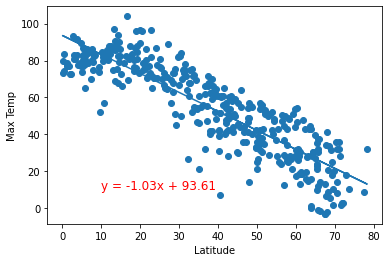

In [112]:
lin_reg_plot(north_df['Lat'],north_df['Max Temp'])
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.540727763457848


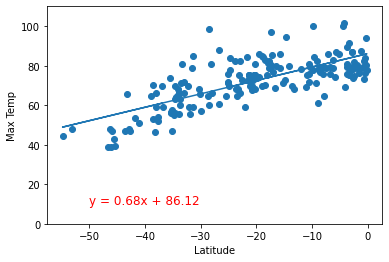

In [114]:
lin_reg_plot(south_df['Lat'],south_df['Max Temp'])
plt.ylim(0,110)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11559923543988217


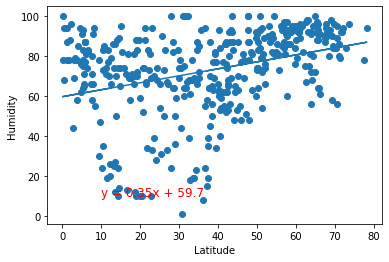

In [116]:
lin_reg_plot(north_df['Lat'],north_df['Humidity'])
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005629884915782018


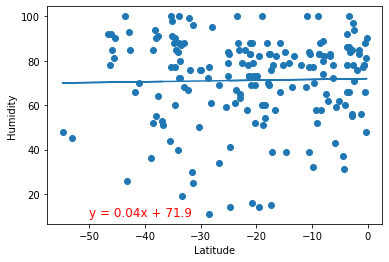

In [117]:
lin_reg_plot(south_df['Lat'],south_df['Humidity'])
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03314390100883676


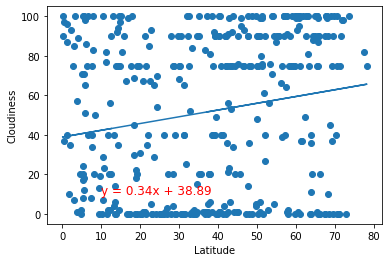

In [118]:
lin_reg_plot(north_df['Lat'],north_df['Cloudiness'])
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0901533589633021


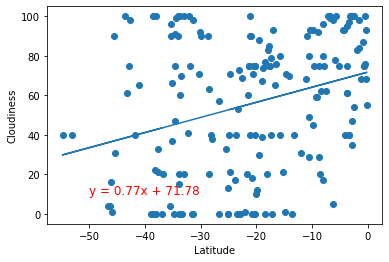

In [120]:
lin_reg_plot(south_df['Lat'],south_df['Cloudiness'])
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01550345355495878


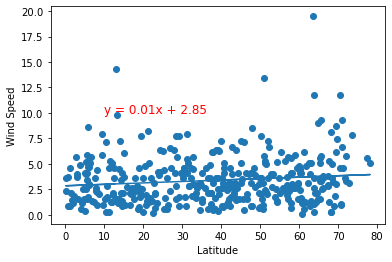

In [121]:
lin_reg_plot(north_df['Lat'],north_df['Wind Speed'])
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01925424054282399


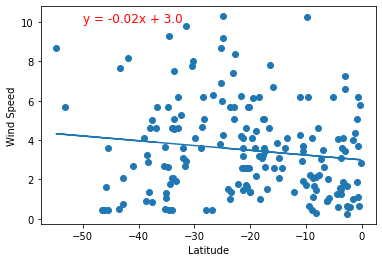

In [122]:
lin_reg_plot(south_df['Lat'],south_df['Wind Speed'])
plt.show()